In [102]:
#Basic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
import os
print(os.listdir())
warnings.filterwarnings('ignore')
%matplotlib inline

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

['.config', 'ananda.csv', '.ipynb_checkpoints', 'sample_data']


In [0]:
dataset = pd.read_csv("/content/ananda.csv")

In [104]:
dataset.shape

(401, 9)

In [105]:
dataset.head()

,Age,Gender,Time_frame,Platform,Likes,help,comments,likead,target
0,21,Male,Short,Mobile_Phone,Maybe,Sometimes,Maybe,No,1
1,22,Female,Long,Mobile_Phone,Maybe,Sometimes,Maybe,No,1
2,22,Male,Short,Mobile_Phone,No,Yes,Yes,No,1
3,22,Male,Long,Mobile_Phone,No,Sometimes,Yes,No,0
4,22,Male,Short,Computer,Yes,Sometimes,Maybe,No,0


In [106]:
dataset.describe()

,Age,target
count,401.000000,401.000000
mean,23.231920,0.600998
std,3.103801,0.490305
min,17.000000,0.000000
25%,21.000000,0.000000
50%,23.000000,1.000000
75%,24.000000,1.000000
max,34.000000,1.000000


In [107]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 9 columns):
Age           401 non-null int64
Gender        401 non-null object
Time_frame    401 non-null object
Platform      401 non-null object
Likes         401 non-null object
help          401 non-null object
comments      401 non-null object
likead        401 non-null object
target        401 non-null int64
dtypes: int64(2), object(7)
memory usage: 28.3+ KB


In [0]:
# mapping dataset to numeric value
Gender_mapping = {"Male": 0, "Female": 1}
dataset['Gender'] = dataset['Gender'].map(Gender_mapping)

Time_frame_mapping = {"Short": 0, "Long": 1}
dataset['Time_frame'] = dataset['Time_frame'].map(Time_frame_mapping)

Platform_mapping = {"Computer": 0, "Mobile_Phone": 1}
dataset['Platform'] = dataset['Platform'].map(Platform_mapping)

Likes_mapping = {"No": 0, "Yes": 1,"Maybe":2}
dataset['Likes'] = dataset['Likes'].map(Likes_mapping)

help_mapping = {"No": 0, "Yes": 1,"Maybe":2,"Sometimes":3}
dataset['help'] = dataset['help'].map(help_mapping)

comments_mapping = {"No": 0, "Yes": 1,"Maybe":2}
dataset['comments'] = dataset['comments'].map(comments_mapping)

likead_mapping = {"No": 0, "Yes": 1}
dataset['likead'] = dataset['likead'].map(likead_mapping)



In [0]:
def bar_chart(feature):
    change_lifestyle = dataset[dataset['target']==1][feature].value_counts()
    not_change_lifestyle = dataset[dataset['target']==0][feature].value_counts()
    df = pd.DataFrame([change_lifestyle, not_change_lifestyle])
    df.index = ['change_lifestyle','not_change_lifestyle']
    df.plot(title= feature, kind='bar',stacked=True, figsize=(8,4), rot=0)
    
 

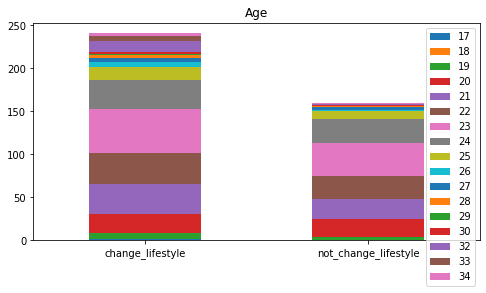

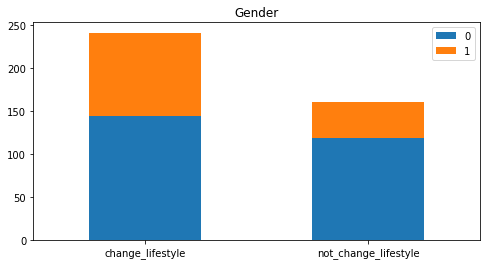

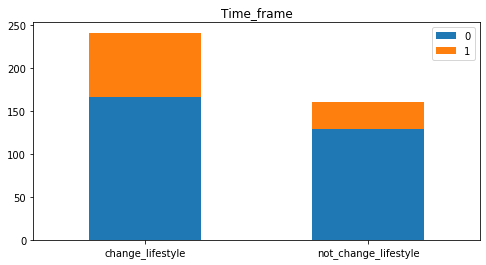

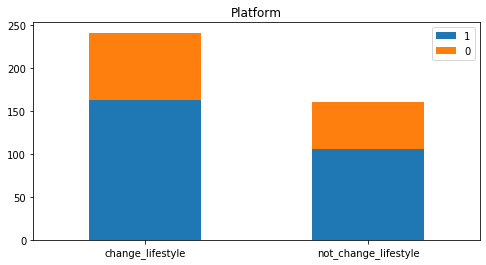

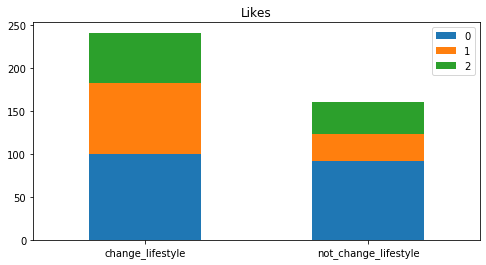

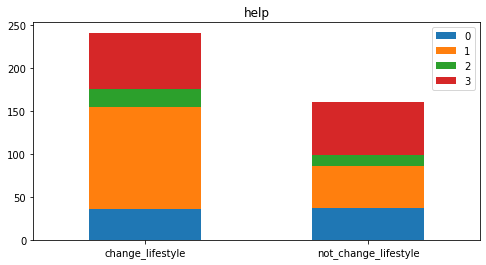

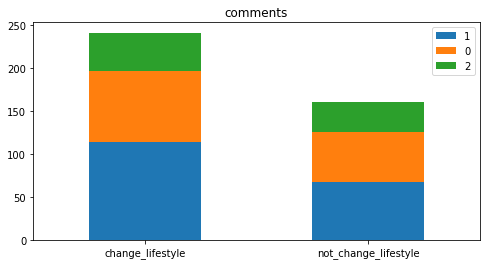

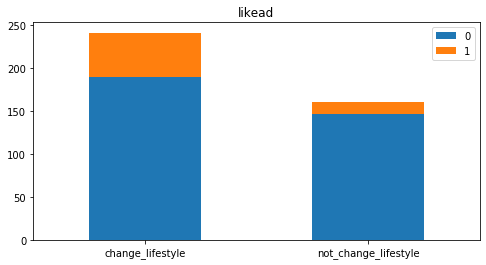

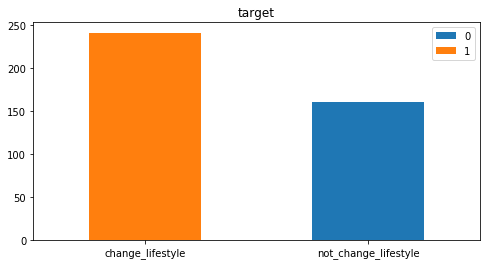

In [110]:
 rcParams['figure.figsize'] = 18, 18
 for i in dataset.columns:
    bar_chart(i)

In [111]:
dataset.isnull().sum()

Age           0
Gender        0
Time_frame    0
Platform      0
Likes         0
help          0
comments      0
likead        0
target        0
dtype: int64

In [0]:
feature_selected = ['Age','Gender', 'Time_frame','Platform', 'Likes', 'help', 'comments',
                'likead' ,'target']
data_selected = dataset[feature_selected]

In [0]:
predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,y_train,y_test = train_test_split(predictors,target,test_size=0.33,random_state=0)

In [0]:
predictors_selected = data_selected.drop("target",axis=1)
target_selected = data_selected["target"]

X_train_selected,X_test_selected,y_train_selected,y_test_selected = train_test_split(predictors_selected,target_selected,test_size=0.33,random_state=0)

In [115]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (268, 8)
X_test (133, 8)
y_train (268,)
y_test (133,)


In [0]:
# for k-fold cross validation
k_fold = KFold(n_splits=8, shuffle=True, random_state=0)

Naive Bayes

In [117]:
# for dataset
nb = GaussianNB()

# score_nb = cross_val_score(nb, predictors, target, cv=k_fold, n_jobs=1, scoring='accuracy')
# score_nb = round(np.mean(score_nb)*100, 2)

nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

accuracy_nb = round(accuracy_score(y_test, y_pred_nb)*100, 2)
precision_nb = round(precision_score(y_test, y_pred_nb)*100, 2)
recall_nb = round(recall_score(y_test, y_pred_nb)*100, 2)
f1_score_nb = round(f1_score(y_test, y_pred_nb)*100, 2)
roc_auc_nb = round(roc_auc_score(y_test, y_pred_nb)*100, 2)

print("Accuracy score of Naive Bayes: "+str(accuracy_nb)+" %")
print("Precision score of Naive Bayes: "+str(precision_nb)+" %")
print("Recall score of Naive Bayes: "+str(recall_nb)+" %")
print("F1 score of Naive Bayes: "+str(f1_score_nb)+" %")
print("ROC AUC score of Naive Bayes: "+str(f1_score_nb)+" %")

Accuracy score of Naive Bayes: 56.39 %
Precision score of Naive Bayes: 65.08 %
Recall score of Naive Bayes: 53.25 %
F1 score of Naive Bayes: 58.57 %
ROC AUC score of Naive Bayes: 58.57 %


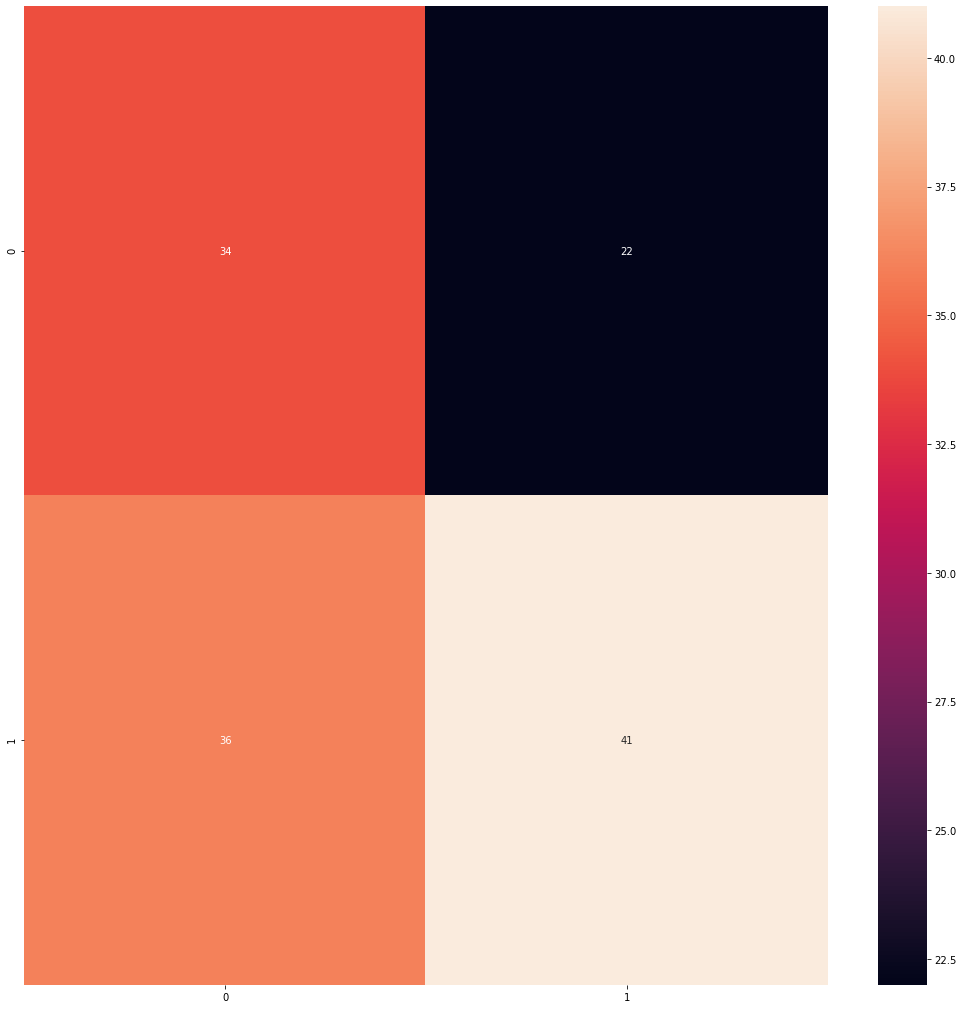

In [118]:

matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(matrix_nb, annot = True, fmt = "d")

In [119]:
# for data_selected
nb = GaussianNB()

# score_nb_selected = cross_val_score(nb, predictors_selected, target_selected, cv=k_fold, n_jobs=1, scoring='accuracy')
# core_nb_selected = round(np.mean(score_nb_selected)*100, 2)

nb.fit(X_train_selected, y_train_selected)
y_pred_nb_selected = nb.predict(X_test_selected)

accuracy_nb_selected = round(accuracy_score(y_test_selected, y_pred_nb_selected)*100, 2)
precision_nb_selected = round(precision_score(y_test_selected, y_pred_nb_selected)*100, 2)
recall_nb_selected = round(recall_score(y_test_selected, y_pred_nb_selected)*100, 2)
f1_score_nb_selected = round(f1_score(y_test_selected, y_pred_nb_selected)*100, 2)
roc_auc_nb_selected = round(roc_auc_score(y_test_selected, y_pred_nb_selected)*100, 2)

print("Accuracy score of Naive Bayes: "+str(accuracy_nb_selected)+" %")
print("Precision score of Naive Bayes: "+str(precision_nb_selected)+" %")
print("Recall score of Naive Bayes: "+str(recall_nb_selected)+" %")
print("F1 score of Naive Bayes: "+str(f1_score_nb_selected)+" %")
print("ROC AUC score of Naive Bayes: "+str(roc_auc_nb_selected)+" %")

Accuracy score of Naive Bayes: 56.39 %
Precision score of Naive Bayes: 65.08 %
Recall score of Naive Bayes: 53.25 %
F1 score of Naive Bayes: 58.57 %
ROC AUC score of Naive Bayes: 56.98 %


In [120]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.49      0.61      0.54        56
           1       0.65      0.53      0.59        77

    accuracy                           0.56       133
   macro avg       0.57      0.57      0.56       133
weighted avg       0.58      0.56      0.57       133



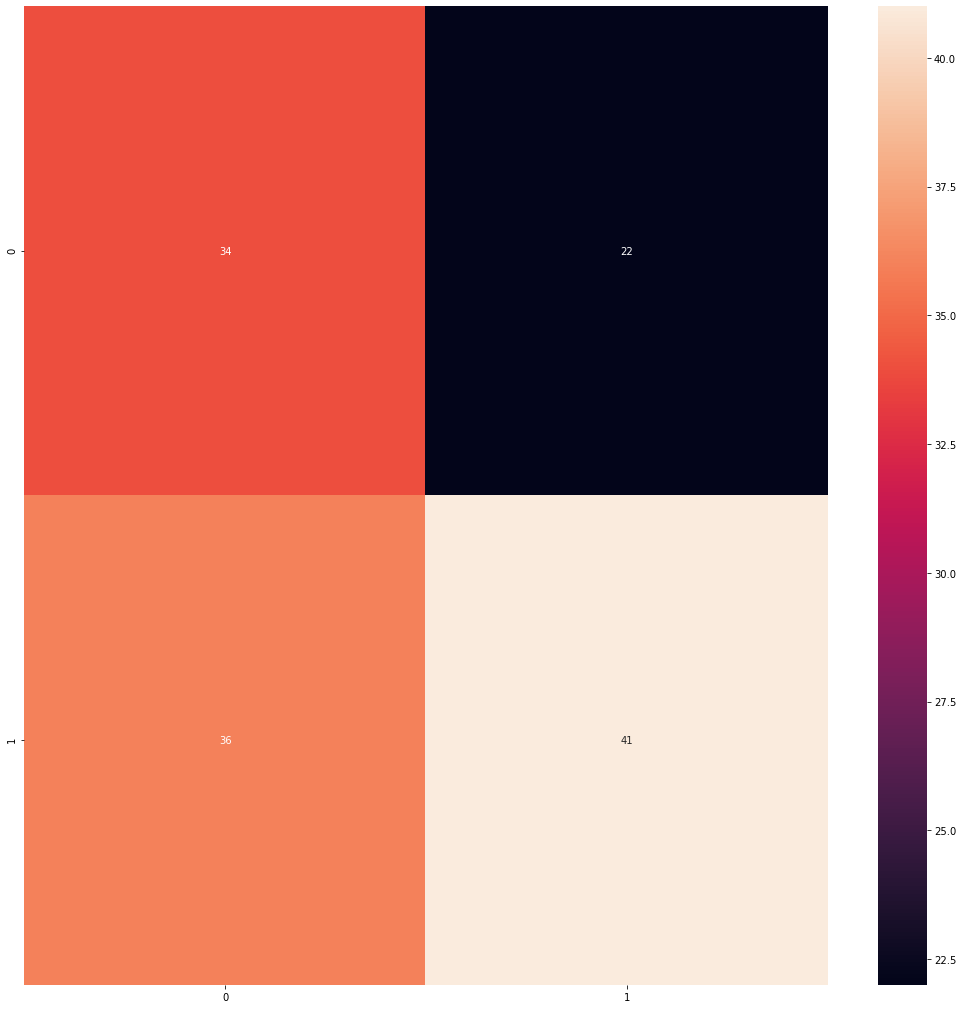

In [121]:
matrix_nb_selected = confusion_matrix(y_test_selected, y_pred_nb_selected)
sns.heatmap(matrix_nb_selected, annot = True, fmt = "d")

Decision Tree

In [122]:
#for dataset
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt, y_test)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

# dt = DecisionTreeClassifier()
# score_dt = cross_val_score(dt, predictors, target, cv=k_fold, n_jobs=1, scoring = 'accuracy')
# score_dt = round(np.mean(score_dt)*100, 2)

accuracy_dt = round(accuracy_score(y_test, y_pred_dt)*100, 2)
precision_dt = round(precision_score(y_test, y_pred_dt)*100, 2)
recall_dt = round(recall_score(y_test, y_pred_dt)*100, 2)
f1_score_dt = round(f1_score(y_test, y_pred_dt)*100, 2)
roc_auc_dt = round(roc_auc_score(y_test_selected, y_pred_dt)*100, 2)

print("Accuracy score of Decision Tree: "+str(accuracy_dt)+" %")
print("Precision score of Decision Tree: "+str(precision_dt)+" %")
print("Recall score of Decision Tree: "+str(recall_dt)+" %")
print("F1 score of Decision Tree: "+str(f1_score_dt)+" %")
print("ROC AUC score of Decision Tree: "+str(roc_auc_dt)+" %")

Accuracy score of Decision Tree: 57.89 %
Precision score of Decision Tree: 62.96 %
Recall score of Decision Tree: 66.23 %
F1 score of Decision Tree: 64.56 %
ROC AUC score of Decision Tree: 56.33 %


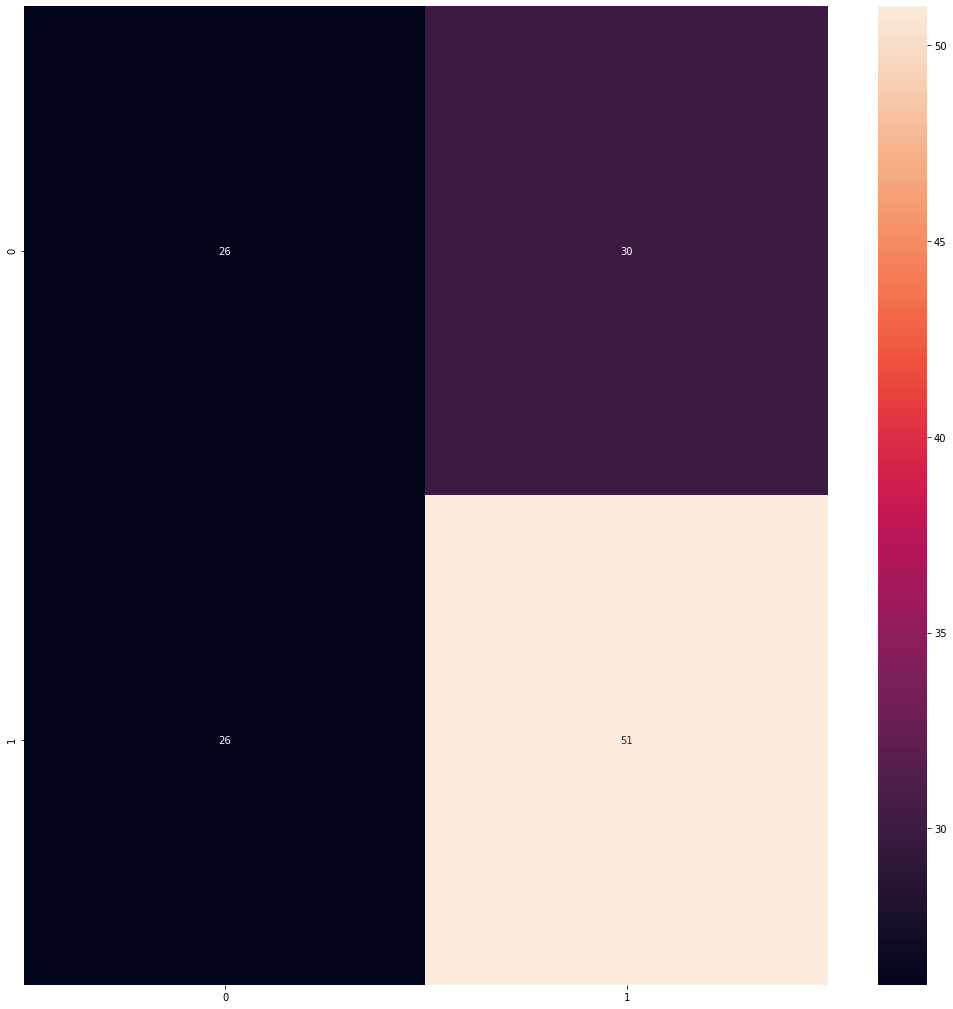

In [123]:
matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(matrix_dt, annot = True, fmt = "d")

In [124]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48        56
           1       0.63      0.66      0.65        77

    accuracy                           0.58       133
   macro avg       0.56      0.56      0.56       133
weighted avg       0.58      0.58      0.58       133



In [125]:
# data_selected
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train_selected, y_train_selected)
    y_pred_dt_selected = dt.predict(X_test_selected)
    current_accuracy = round(accuracy_score(y_pred_dt_selected, y_test_selected)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_selected,y_train_selected)
y_pred_dt_selected = dt.predict(X_test_selected)

# dt = DecisionTreeClassifier()
# score_dt_selected = cross_val_score(dt, predictors_selected, target_selected, cv=k_fold, n_jobs=1, scoring = 'accuracy')
# score_dt_selected = round(np.mean(score_dt_selected)*100, 2)

accuracy_dt_selected = round(accuracy_score(y_test_selected, y_pred_dt_selected)*100, 2)
precision_dt_selected = round(precision_score(y_test_selected, y_pred_dt_selected)*100, 2)
recall_dt_selected = round(recall_score(y_test_selected, y_pred_dt_selected)*100, 2)
f1_score_dt_selected = round(f1_score(y_test_selected, y_pred_dt_selected)*100, 2)
roc_auc_dt_selected = round(roc_auc_score(y_test_selected, y_pred_dt_selected)*100, 2)

print("Accuracy score of Decision Tree: "+str(accuracy_dt_selected)+" %")
print("Precision score of Decision Tree: "+str(precision_dt_selected)+" %")
print("Recall score of Decision Tree: "+str(recall_dt_selected)+" %")
print("F1 score of Decision Tree: "+str(f1_score_dt_selected)+" %")
print("ROC AUC score of Decision Tree: "+str(roc_auc_dt_selected)+" %")

Accuracy score of Decision Tree: 57.89 %
Precision score of Decision Tree: 62.96 %
Recall score of Decision Tree: 66.23 %
F1 score of Decision Tree: 64.56 %
ROC AUC score of Decision Tree: 56.33 %


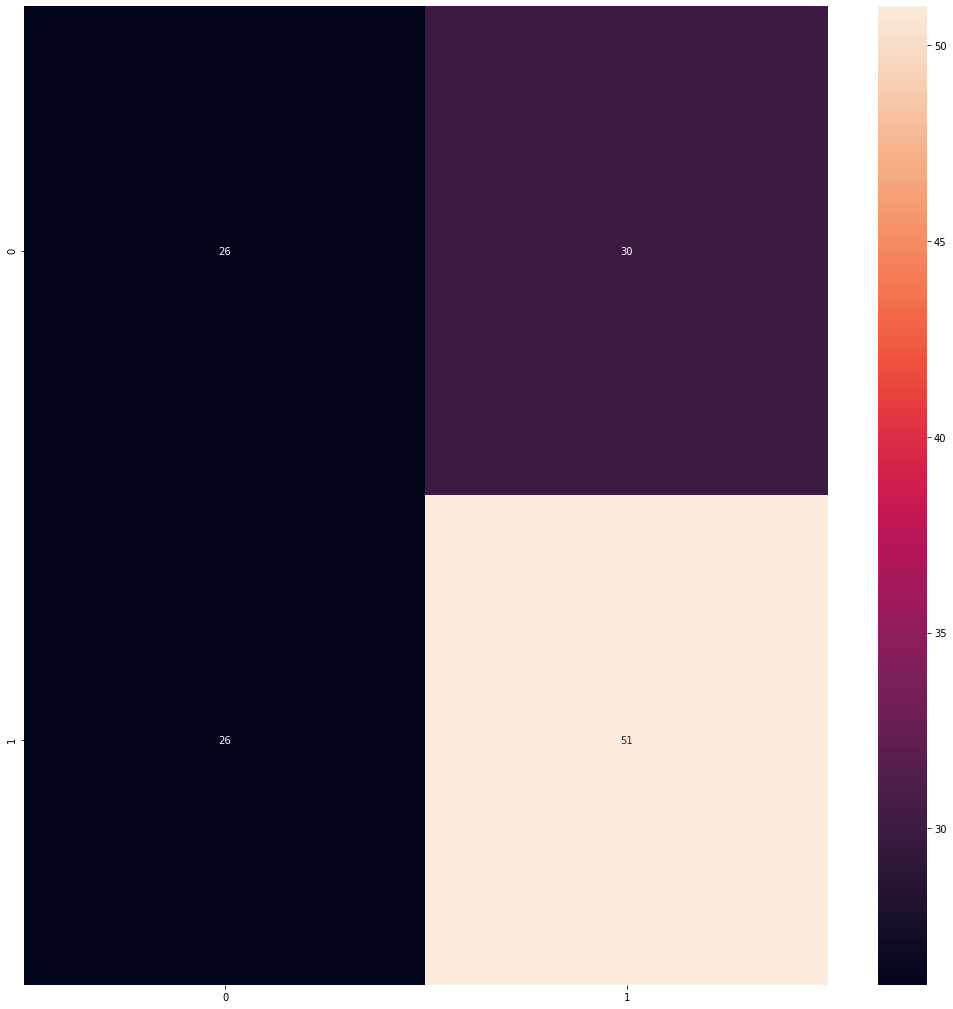

In [126]:
matrix_dt_selected = confusion_matrix(y_test_selected, y_pred_dt_selected)
sns.heatmap(matrix_dt_selected, annot = True, fmt = "d")

In [127]:
print(classification_report(y_test_selected, y_pred_dt_selected))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48        56
           1       0.63      0.66      0.65        77

    accuracy                           0.58       133
   macro avg       0.56      0.56      0.56       133
weighted avg       0.58      0.58      0.58       133



Random Forest


In [128]:
# for dataset
max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state = x)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf, y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

# rf = RandomForestClassifier()
# score_rf = cross_val_score(rf, predictors, target, cv=k_fold, n_jobs=1, scoring = 'accuracy')
# score_rf = round(np.mean(score_rf)*100, 2)

accuracy_rf = round(accuracy_score(y_test, y_pred_rf)*100, 2)
precision_rf = round(precision_score(y_test, y_pred_rf)*100, 2)
recall_rf = round(recall_score(y_test, y_pred_rf)*100, 2)
f1_score_rf = round(f1_score(y_test, y_pred_rf)*100, 2)
roc_auc_rf = round(roc_auc_score(y_test_selected, y_pred_rf)*100, 2)

print("Accuracy score of Random Forest: "+str(accuracy_rf)+" %")
print("Precision score of Random Forest: "+str(precision_rf)+" %")
print("Recall score of Random Forest: "+str(recall_rf)+" %")
print("F1 score of Random Forest: "+str(f1_score_rf)+" %")
print("ROC AUC score of Random Forest: "+str(roc_auc_rf)+" %")

Accuracy score of Random Forest: 69.17 %
Precision score of Random Forest: 70.93 %
Recall score of Random Forest: 79.22 %
F1 score of Random Forest: 74.85 %
ROC AUC score of Random Forest: 67.29 %


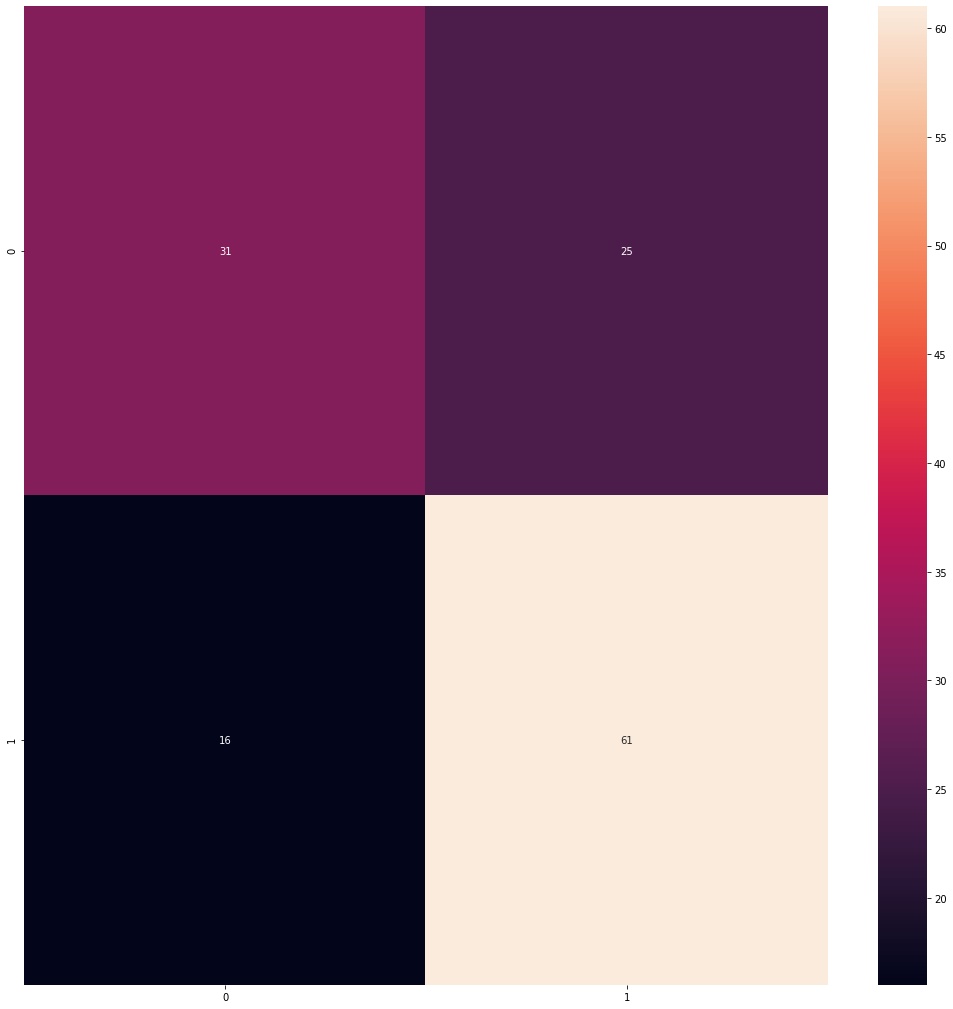

In [129]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix_rf, annot = True, fmt = "d")

In [130]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.66      0.55      0.60        56
           1       0.71      0.79      0.75        77

    accuracy                           0.69       133
   macro avg       0.68      0.67      0.68       133
weighted avg       0.69      0.69      0.69       133



In [131]:
# for data_selected
max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train_selected,y_train_selected)
    y_pred_rf_selected = rf.predict(X_test_selected)
    current_accuracy = round(accuracy_score(y_pred_rf_selected, y_test_selected)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train_selected,y_train_selected)
y_pred_rf_selected = rf.predict(X_test_selected)

# rf = RandomForestClassifier()
# score_rf_selected = cross_val_score(rf, predictors_selected, target_selected, cv=k_fold, n_jobs=1, scoring = 'accuracy')
# score_rf_selected = round(np.mean(score_rf_selected)*100,2)

accuracy_rf_selected = round(accuracy_score(y_test_selected, y_pred_rf_selected)*100, 2)
precision_rf_selected = round(precision_score(y_test_selected, y_pred_rf_selected)*100, 2)
recall_rf_selected = round(recall_score(y_test_selected, y_pred_rf_selected)*100, 2)
f1_score_rf_selected = round(f1_score(y_test_selected, y_pred_rf_selected)*100, 2)
roc_auc_rf_selected = round(roc_auc_score(y_test_selected, y_pred_rf_selected)*100, 2)

print("Accuracy score of Random Forest: "+str(accuracy_rf_selected)+" %")
print("Precision score of Random Forest: "+str(precision_rf_selected)+" %")
print("Recall score of Random Forest: "+str(recall_rf_selected)+" %")
print("F1 score of Random Forest: "+str(f1_score_rf_selected)+" %")
print("ROC AUC score of Random Forest: "+str(roc_auc_rf_selected)+" %")


Accuracy score of Random Forest: 69.17 %
Precision score of Random Forest: 70.93 %
Recall score of Random Forest: 79.22 %
F1 score of Random Forest: 74.85 %
ROC AUC score of Random Forest: 67.29 %


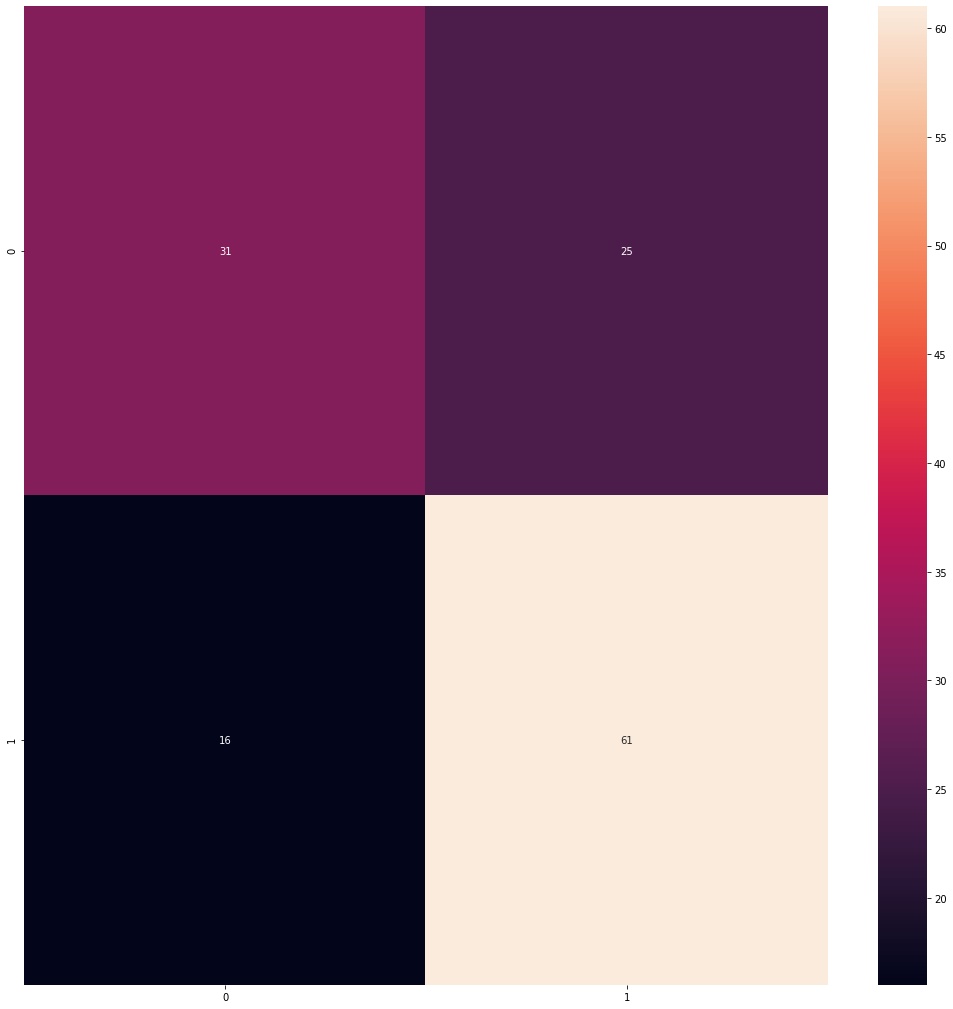

In [132]:
matrix_rf_selected = confusion_matrix(y_test_selected, y_pred_rf_selected)
sns.heatmap(matrix_rf_selected, annot = True, fmt = "d")

In [133]:
print(classification_report(y_test_selected, y_pred_rf_selected))

              precision    recall  f1-score   support

           0       0.66      0.55      0.60        56
           1       0.71      0.79      0.75        77

    accuracy                           0.69       133
   macro avg       0.68      0.67      0.68       133
weighted avg       0.69      0.69      0.69       133



Multi-Layer Perceptron

In [134]:
# for dataset

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(13,13,13),max_iter=5000)

# score_xgb = cross_val_score(xgb, predictors, target, cv = k_fold, n_jobs = 1, scoring = 'accuracy')
# score_xgb = round(np.mean(score_xgb)*100, 2)

mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

accuracy_mlp = round(accuracy_score(y_test, y_pred_mlp)*100, 2)
precision_mlp = round(precision_score(y_test, y_pred_mlp)*100, 2)
recall_mlp = round(recall_score(y_test, y_pred_mlp)*100, 2)
f1_score_mlp = round(f1_score(y_test, y_pred_mlp)*100, 2)
roc_auc_mlp = round(roc_auc_score(y_test_selected, y_pred_mlp)*100, 2)

print("Accuracy score of Multi-Layer Perceptron: "+str(accuracy_mlp)+" %")
print("Precision score of Multi-Layer Perceptron: "+str(precision_mlp)+" %")
print("Recall score of Multi-Layer Perceptron: "+str(recall_mlp)+" %")
print("F1 score of Multi-Layer Perceptron: "+str(f1_score_mlp)+" %")
print("ROC AUC score of Multi-Layer Perceptron: "+str(roc_auc_mlp)+" %")

Accuracy score of Multi-Layer Perceptron: 58.65 %
Precision score of Multi-Layer Perceptron: 61.22 %
Recall score of Multi-Layer Perceptron: 77.92 %
F1 score of Multi-Layer Perceptron: 68.57 %
ROC AUC score of Multi-Layer Perceptron: 55.03 %


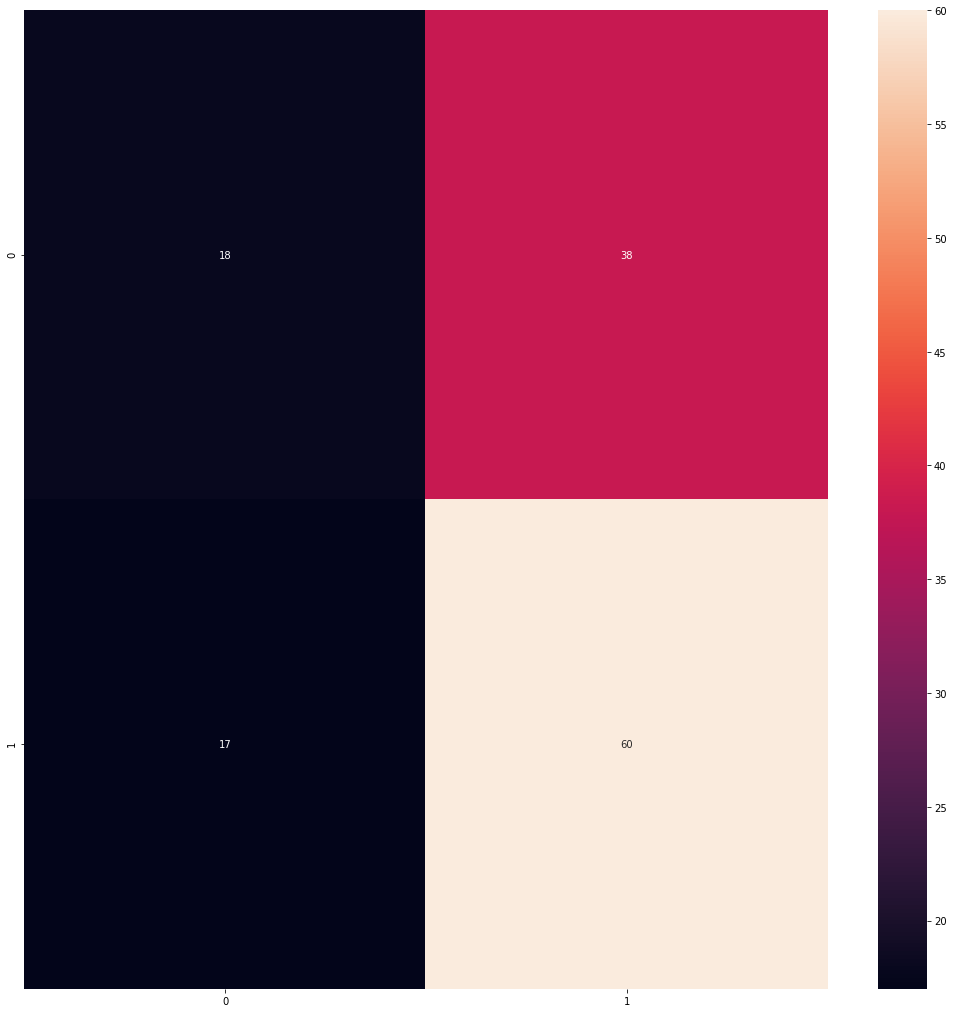

In [135]:
matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(matrix_mlp, annot = True, fmt = "d")

In [136]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.51      0.32      0.40        56
           1       0.61      0.78      0.69        77

    accuracy                           0.59       133
   macro avg       0.56      0.55      0.54       133
weighted avg       0.57      0.59      0.56       133



In [137]:
# for data_selected

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(13,13,13),max_iter=5000)

# score_xgb = cross_val_score(xgb, predictors, target, cv = k_fold, n_jobs = 1, scoring = 'accuracy')
# score_xgb = round(np.mean(score_xgb)*100, 2)

mlp.fit(X_train_selected,y_train_selected)
y_pred_mlp_selected = mlp.predict(X_test_selected)

accuracy_mlp_selected = round(accuracy_score(y_test_selected, y_pred_mlp_selected)*100, 2)
precision_mlp_selected = round(precision_score(y_test_selected, y_pred_mlp_selected)*100, 2)
recall_mlp_selected = round(recall_score(y_test_selected, y_pred_mlp_selected)*100, 2)
f1_score_mlp_selected = round(f1_score(y_test_selected, y_pred_mlp_selected)*100, 2)
roc_auc_mlp_selected = round(roc_auc_score(y_test_selected, y_pred_mlp_selected)*100, 2)

print("Accuracy score of Multi-Layer Perceptron: "+str(accuracy_mlp_selected)+" %")
print("Precision score of Multi-Layer Perceptron: "+str(precision_mlp_selected)+" %")
print("Recall score of Multi-Layer Perceptron: "+str(recall_mlp_selected)+" %")
print("F1 score of Multi-Layer Perceptron: "+str(f1_score_mlp_selected)+" %")
print("ROC AUC score of Multi-Layer Perceptron: "+str(roc_auc_mlp_selected)+" %")

Accuracy score of Multi-Layer Perceptron: 62.41 %
Precision score of Multi-Layer Perceptron: 65.88 %
Recall score of Multi-Layer Perceptron: 72.73 %
F1 score of Multi-Layer Perceptron: 69.14 %
ROC AUC score of Multi-Layer Perceptron: 60.47 %


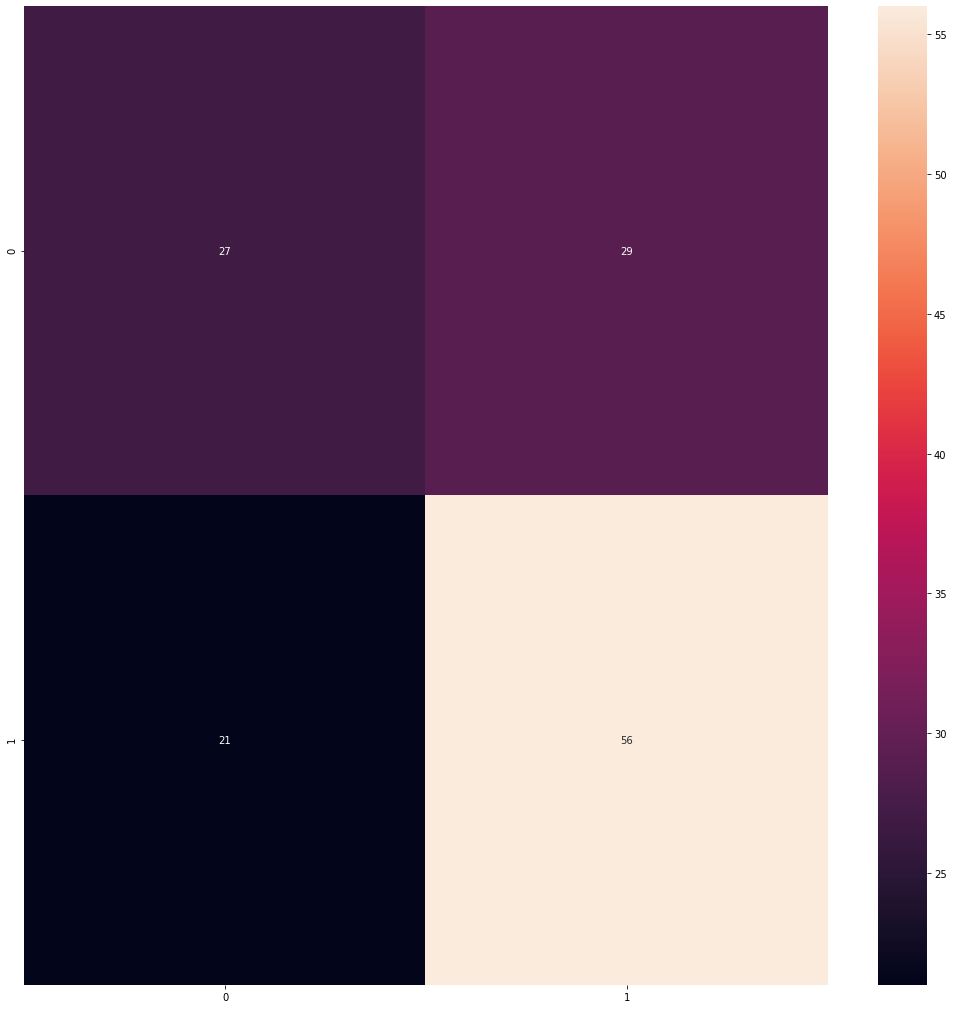

In [138]:
matrix_mlp_selected = confusion_matrix(y_test_selected, y_pred_mlp_selected)
sns.heatmap(matrix_mlp_selected, annot = True, fmt = "d")

In [139]:
print(classification_report(y_test_selected, y_pred_mlp_selected))

              precision    recall  f1-score   support

           0       0.56      0.48      0.52        56
           1       0.66      0.73      0.69        77

    accuracy                           0.62       133
   macro avg       0.61      0.60      0.61       133
weighted avg       0.62      0.62      0.62       133

